In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df=pd.read_csv('/content/drive/MyDrive/Makine Öğrenmesi ile Çalışan İşten Ayrılma Tahmini/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("\nDetaylı Bilgi:")
df.info()


Detaylı Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel

In [78]:
print("Veri boyutu:",df.shape)

Veri boyutu: (1470, 35)


In [79]:
print("Eksik veri:")
print(df.isnull().sum().sum())

Eksik veri:
0


In [80]:
sabit_sutunlar = []
id_gibi_sutunlar = []

print("Sütunlar taranıyor...\n")

for col in df.columns:
    unique_count = df[col].nunique()
    total_rows = len(df)

    # Sadece 1 değer varsa
    if unique_count == 1:
        sabit_sutunlar.append(col)
        print(f" TESPİT EDİLDİ (Sabit): '{col}' sütununda sadece 1 değer var -> {df[col].unique()}")

    # Satır sayısı kadar farklı değer varsa
    elif unique_count == total_rows:
        id_gibi_sutunlar.append(col)
        print(f" ŞÜPHELİ (ID Olabilir): '{col}' sütununda herkesin değeri farklı.")

print("-" * 40)
print(f"Otomatik Bulunan Silinecek Sütunlar: {sabit_sutunlar}")
print(f"İncelenmesi Gereken ID Sütunları: {id_gibi_sutunlar}")

Sütunlar taranıyor...

 TESPİT EDİLDİ (Sabit): 'EmployeeCount' sütununda sadece 1 değer var -> [1]
 ŞÜPHELİ (ID Olabilir): 'EmployeeNumber' sütununda herkesin değeri farklı.
 TESPİT EDİLDİ (Sabit): 'Over18' sütununda sadece 1 değer var -> ['Y']
 TESPİT EDİLDİ (Sabit): 'StandardHours' sütununda sadece 1 değer var -> [80]
----------------------------------------
Otomatik Bulunan Silinecek Sütunlar: ['EmployeeCount', 'Over18', 'StandardHours']
İncelenmesi Gereken ID Sütunları: ['EmployeeNumber']


In [81]:
cols_to_check = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

for col in cols_to_check:
    unique_vals = df[col].unique()
    print(f"Sütun: {col}")
    print(f"Benzersiz Değer Sayısı: {len(unique_vals)}")
    print(f"Değerler: {unique_vals}")
    print("-" * 30)

Sütun: EmployeeCount
Benzersiz Değer Sayısı: 1
Değerler: [1]
------------------------------
Sütun: Over18
Benzersiz Değer Sayısı: 1
Değerler: ['Y']
------------------------------
Sütun: StandardHours
Benzersiz Değer Sayısı: 1
Değerler: [80]
------------------------------
Sütun: EmployeeNumber
Benzersiz Değer Sayısı: 1470
Değerler: [   1    2    4 ... 2064 2065 2068]
------------------------------


In [82]:
silinecek_sutunlar = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=silinecek_sutunlar)

In [83]:
print(f"Mevcut Sütun Sayısı: {df.shape[1]}")
print(df.columns.tolist())

Mevcut Sütun Sayısı: 31
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [84]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

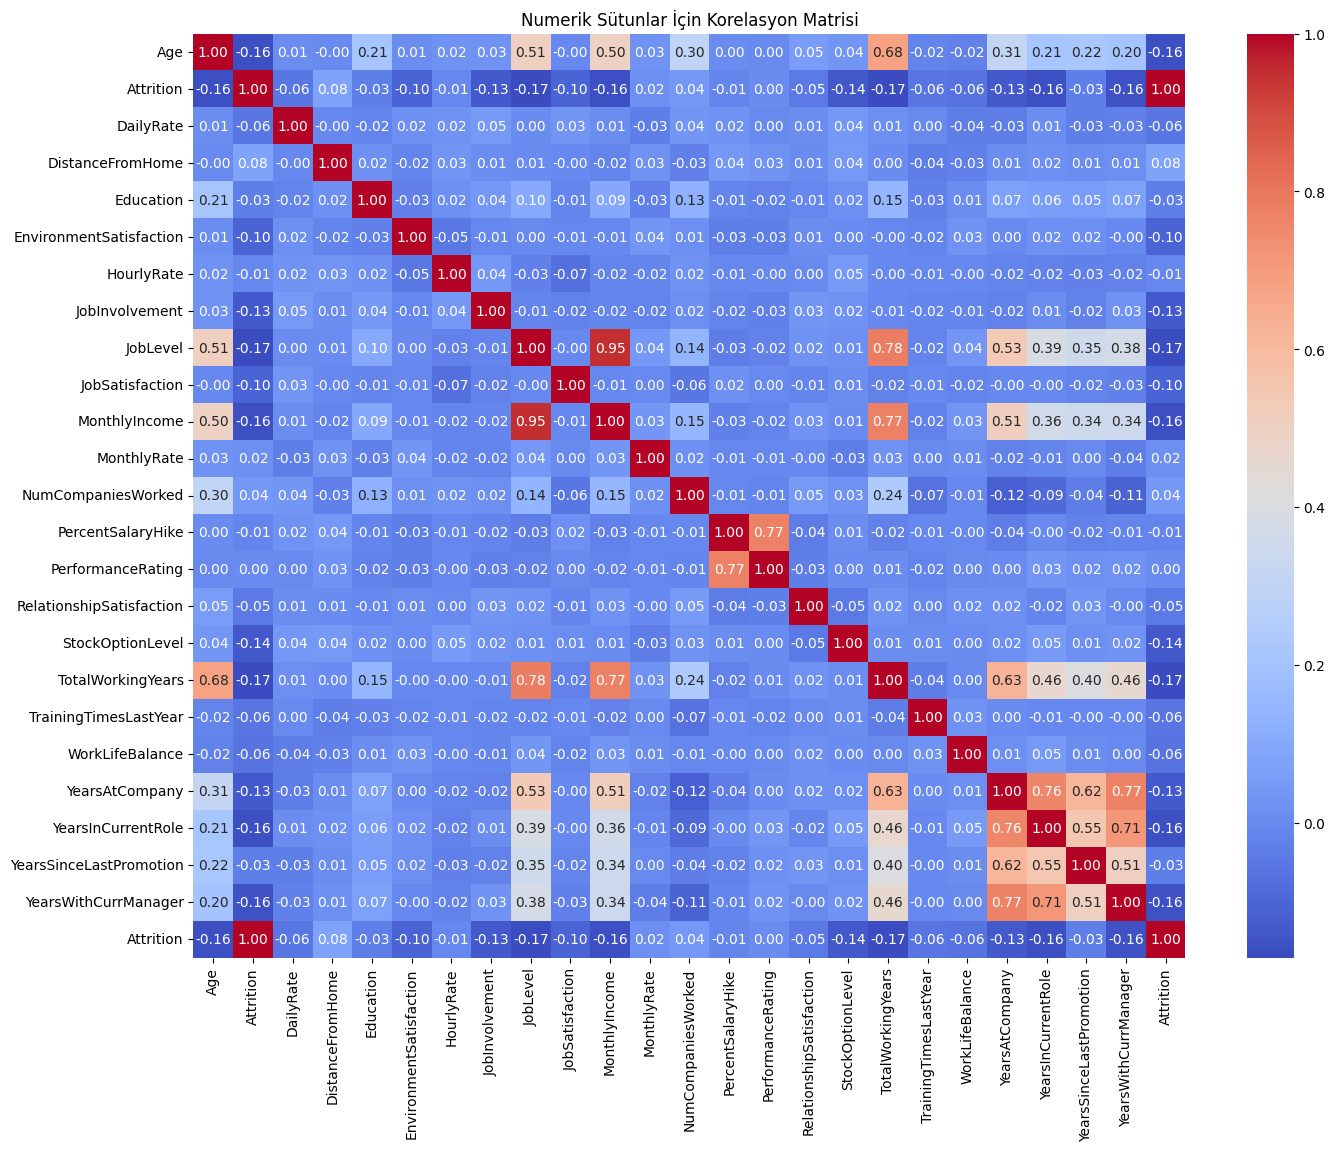

In [85]:
# KORELASYON MATRİSİ (Numerik Kolonlara Göre)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(16, 12))

# Filter numeric_cols to only include columns present in the DataFrame
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]

sns.heatmap(df[existing_numeric_cols + ['Attrition']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Numerik Sütunlar İçin Korelasyon Matrisi")
plt.show()

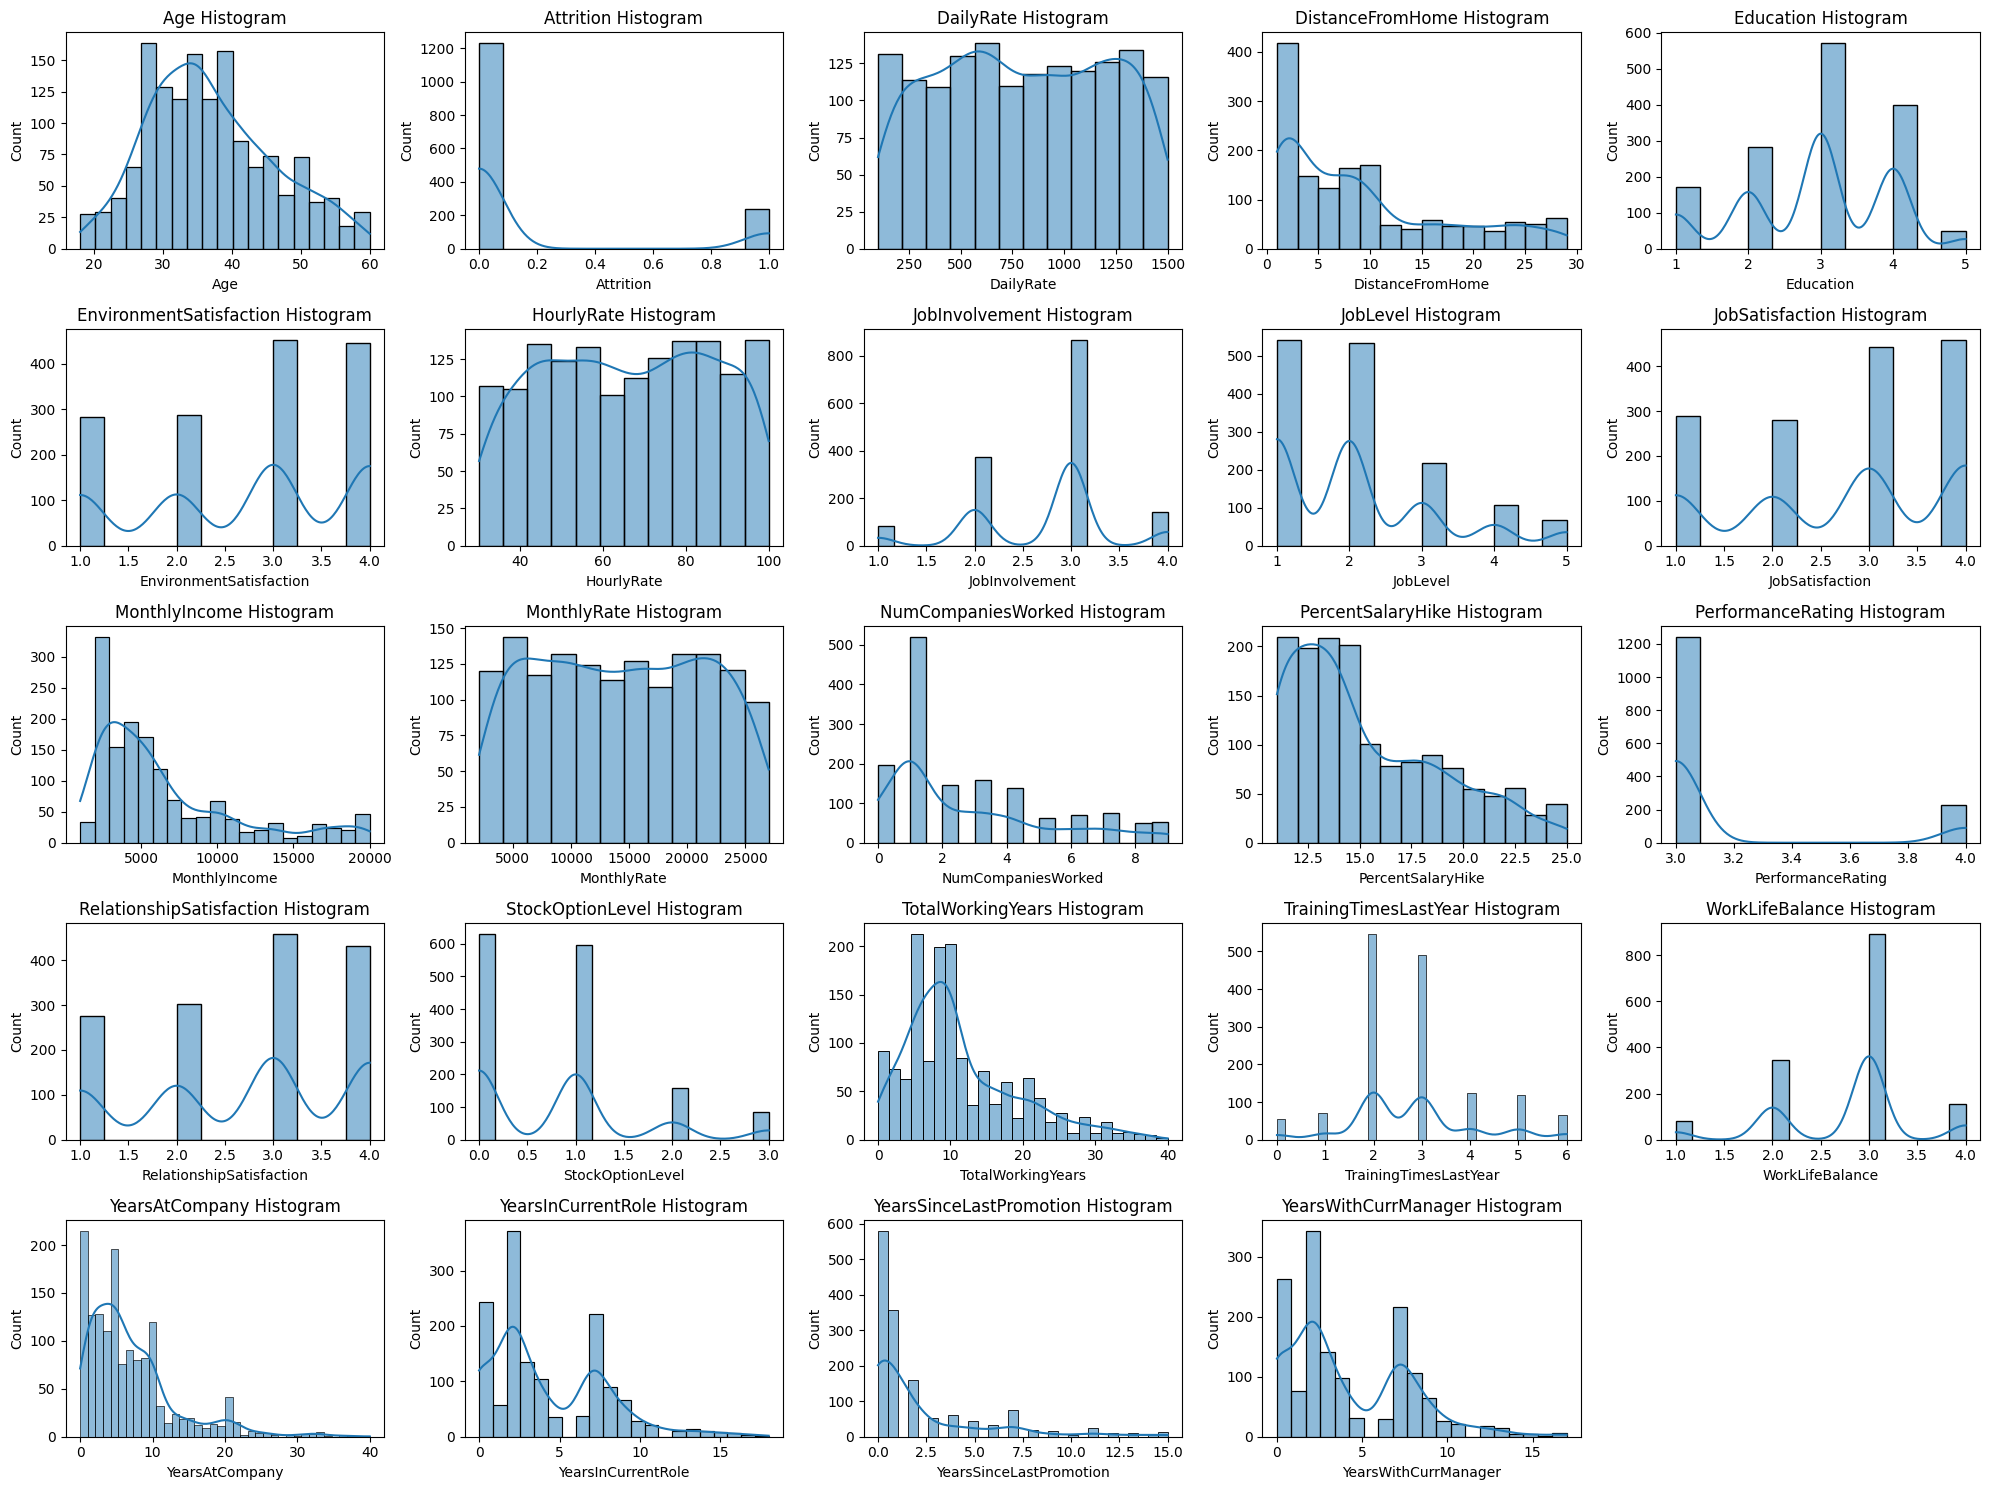

In [86]:
# HISTOGRAMLAR
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Histogram")
plt.tight_layout()
plt.show()

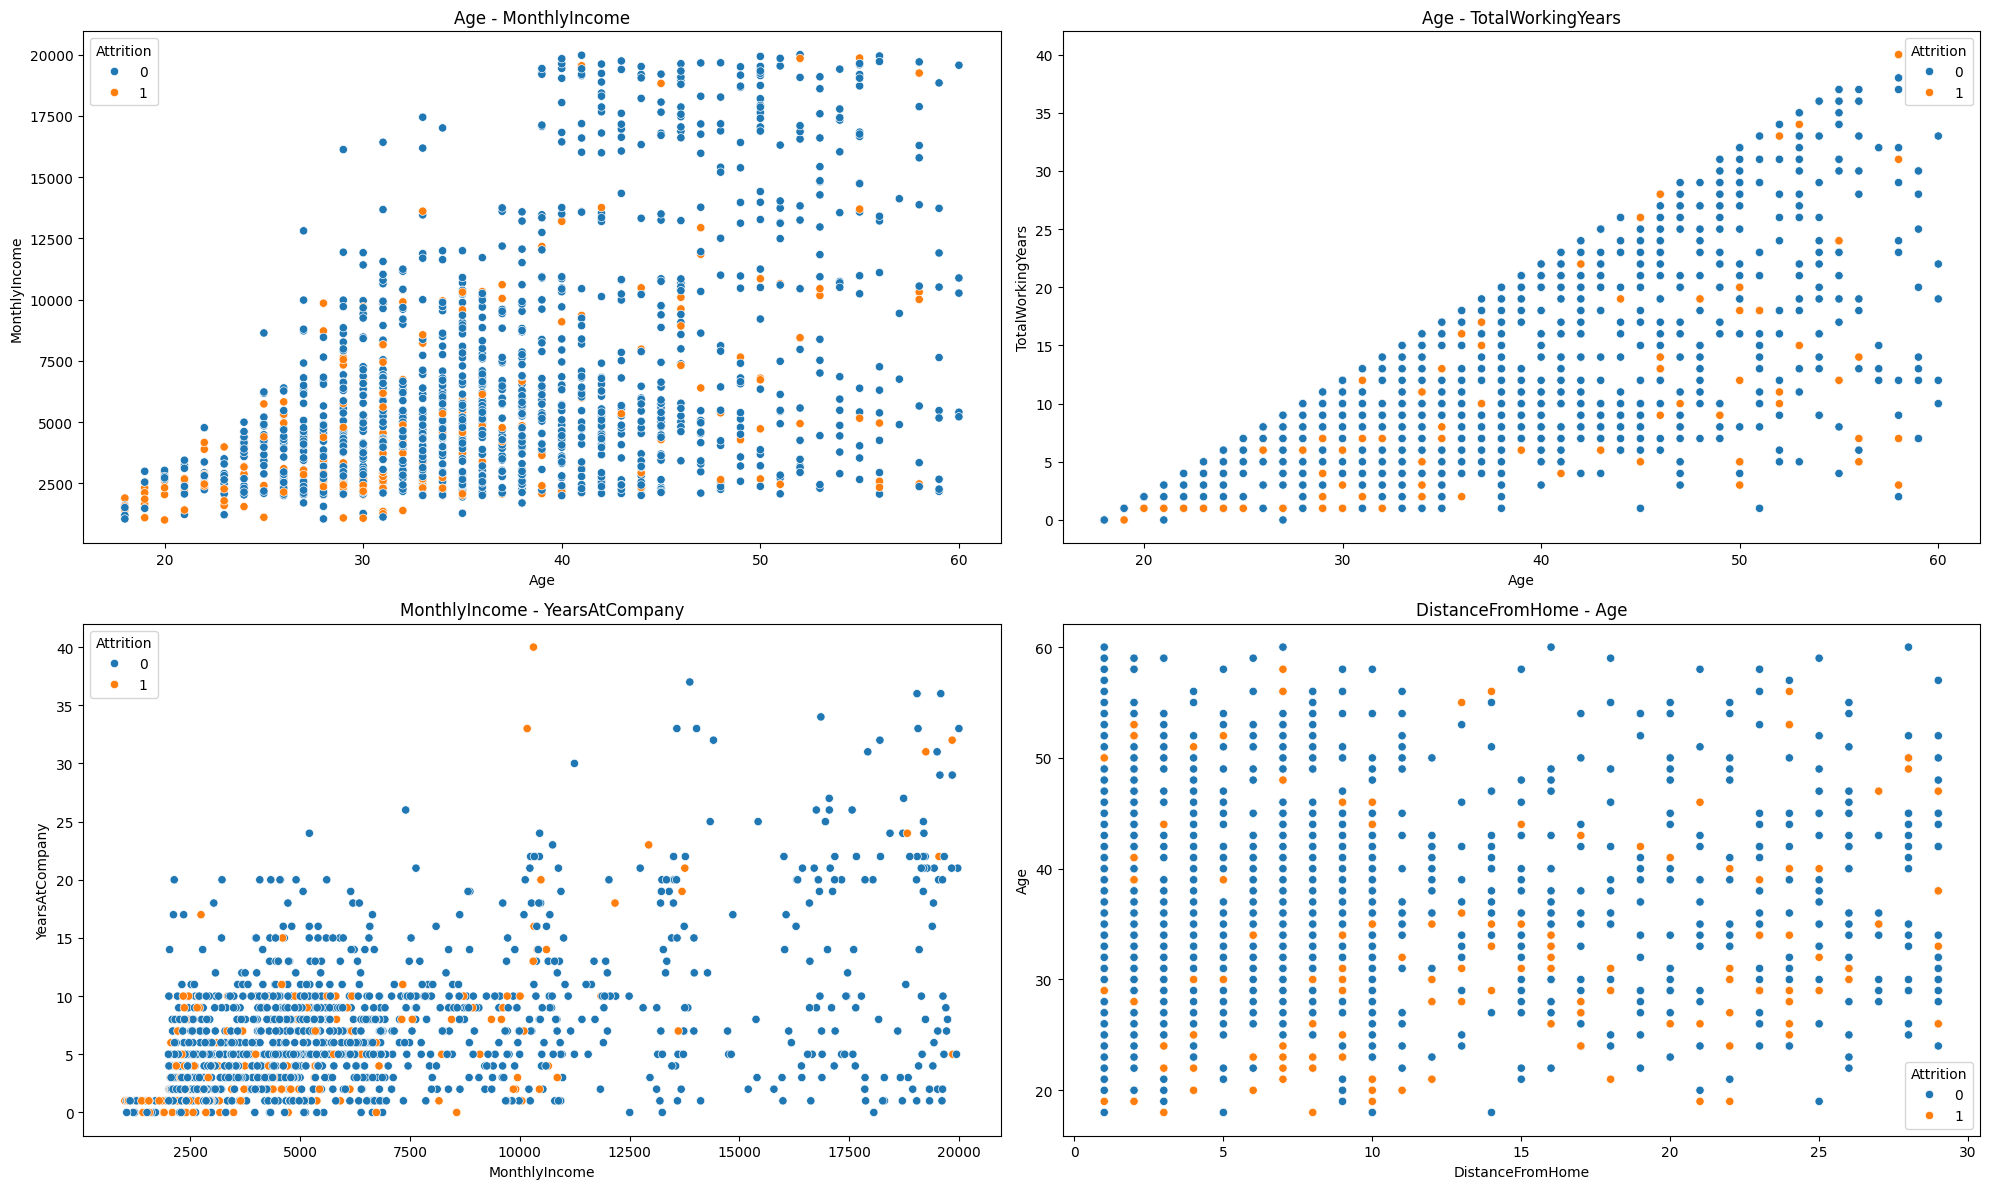

In [87]:
# SCATTER PLOT ÖRNEKLERİ
scatter_pairs = [
    ('Age', 'MonthlyIncome'),
    ('Age', 'TotalWorkingYears'),
    ('MonthlyIncome', 'YearsAtCompany'),
    ('DistanceFromHome', 'Age')
]

plt.figure(figsize=(20, 12))
for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y, hue='Attrition')
    plt.title(f"{x} - {y}")
plt.tight_layout()
plt.show()

In [88]:
# FEATURE ENGINEERING - YENİ ÖZELLİKLER OLUŞTURMA

# 1) Maaş / Deneyim oranı (şirket için önemli bir metrik)
df['IncomePerExperience'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

# 2) Yaş grupları
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[18, 30, 40, 50, 60],
                        labels=['Genç', 'OrtaGenç', 'Orta', 'Kıdemli'])

# 3) Şirkette kalış süresi (tenure) kategorisi
df['TenureCategory'] = pd.cut(df['YearsAtCompany'],
                              bins=[0, 2, 5, 10, 40],
                              labels=['Yeni', 'Deneyimli', 'UzunSüreli', 'ÇokUzun'])

# 4) Promosyon almama süresi (riskli durum)
df['PromotionGap'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)

# 5) Yönetici ile çalışma oranı (çok düşükse ayrılma riski artabilir)
df['ManagerYearsRatio'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)

# 6) Fazla mesai + Maaş oranı (overworking riski)
df['OvertimeRisk'] = df['OverTime'].apply(lambda x: 1 if x == "Yes" else 0) * df['MonthlyIncome']

# 7) İş memnuniyet skoru (ortalama skor)
df['SatisfactionScore'] = (
    df['EnvironmentSatisfaction'] +
    df['JobSatisfaction'] +
    df['RelationshipSatisfaction']
) / 3

# 8) İş-yaşam dengesi kötü olan çalışanlar için flag
df['WorkLifeFlag'] = df['WorkLifeBalance'].apply(lambda x: 1 if x <= 2 else 0)

# 9) Şirkete uzaklık etkisi için bayrak
df['TravelFlag'] = df['DistanceFromHome'].apply(lambda x: 1 if x > 20 else 0)

# 10) Maaş artış hızı (şirketteki yıllara göre ne kadar artmış)
df['SalaryGrowthSpeed'] = df['PercentSalaryHike'] / (df['YearsAtCompany'] + 1)

In [89]:
nominal_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
    'MaritalStatus', 'OverTime', 'AgeGroup', 'TenureCategory'
]

ordinal_cols = [
    'Education', 'JobLevel', 'PerformanceRating', 'EnvironmentSatisfaction',
    'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'StockOptionLevel'
]

numeric_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    # Feature engineering ile eklenen yeni sayısallar:
    'IncomePerExperience', 'PromotionGap', 'ManagerYearsRatio', 'OvertimeRisk',
    'SatisfactionScore', 'WorkLifeFlag', 'TravelFlag', 'SalaryGrowthSpeed'
]

print("\nNominal:", nominal_cols)
print("\nOrdinal:", ordinal_cols)
print("\nNumerik:", numeric_cols)


Nominal: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'AgeGroup', 'TenureCategory']

Ordinal: ['Education', 'JobLevel', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

Numerik: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerExperience', 'PromotionGap', 'ManagerYearsRatio', 'OvertimeRisk', 'SatisfactionScore', 'WorkLifeFlag', 'TravelFlag', 'SalaryGrowthSpeed']


In [90]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [91]:
# Ordinal kategoriler için sıralamalar

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_categories = [
    [1,2,3,4,5],   # Education
    [1,2,3,4,5],   # JobLevel
    [1,2,3,4,5],   # PerformanceRating
    [1,2,3,4],     # EnvironmentSatisfaction
    [1,2,3,4],     # JobInvolvement
    [1,2,3,4],     # JobSatisfaction
    [1,2,3,4],     # RelationshipSatisfaction
    [1,2,3,4],     # WorkLifeBalance
    [0,1,2,3]      # StockOptionLevel
]

# -----------------------------------------------------
# 1) StandardScaler kullanan PREPROCESSOR
# -----------------------------------------------------
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ]
)

# -----------------------------------------------------
# 2) MinMaxScaler kullanan PREPROCESSOR
# -----------------------------------------------------
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('numeric', MinMaxScaler(), numeric_cols)
    ]
)

# -----------------------------------------------------
# 3) Ağaç tabanlı algoritmalar için SCALER OLMAYAN PREPROCESSOR
# -----------------------------------------------------
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('numeric', 'passthrough', numeric_cols)
    ]
)

print("Tüm preprocessor'lar hazır!")

Tüm preprocessor'lar hazır!


In [92]:
# FEATURE SELECTION ANALİZİ
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import shap
import warnings
warnings.filterwarnings('ignore')

preprocessor = preprocessor_standard

preprocessor.fit(X_train)

feature_names = preprocessor.get_feature_names_out()

print(f"✓ Toplam Feature Sayısı: {len(feature_names)}")

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"✓ Train veri boyutu: {X_train_processed.shape}")
print(f"✓ Test veri boyutu: {X_test_processed.shape}")

✓ Toplam Feature Sayısı: 60
✓ Train veri boyutu: (1176, 60)
✓ Test veri boyutu: (294, 60)



--- EN YÜKSEK KORELASYONLU 15 FEATURE ---
                  Feature  Correlation  Abs_Correlation
0       SalaryGrowthSpeed     0.194240         0.194240
1       TotalWorkingYears    -0.171063         0.171063
2      YearsInCurrentRole    -0.160545         0.160545
3           MonthlyIncome    -0.159840         0.159840
4                     Age    -0.159205         0.159205
5    YearsWithCurrManager    -0.156199         0.156199
6       ManagerYearsRatio    -0.153259         0.153259
7       SatisfactionScore    -0.146819         0.146819
8          YearsAtCompany    -0.134392         0.134392
9     IncomePerExperience     0.097731         0.097731
10       DistanceFromHome     0.077924         0.077924
11           OvertimeRisk     0.075027         0.075027
12             TravelFlag     0.064801         0.064801
13           WorkLifeFlag     0.059783         0.059783
14  TrainingTimesLastYear    -0.059478         0.059478


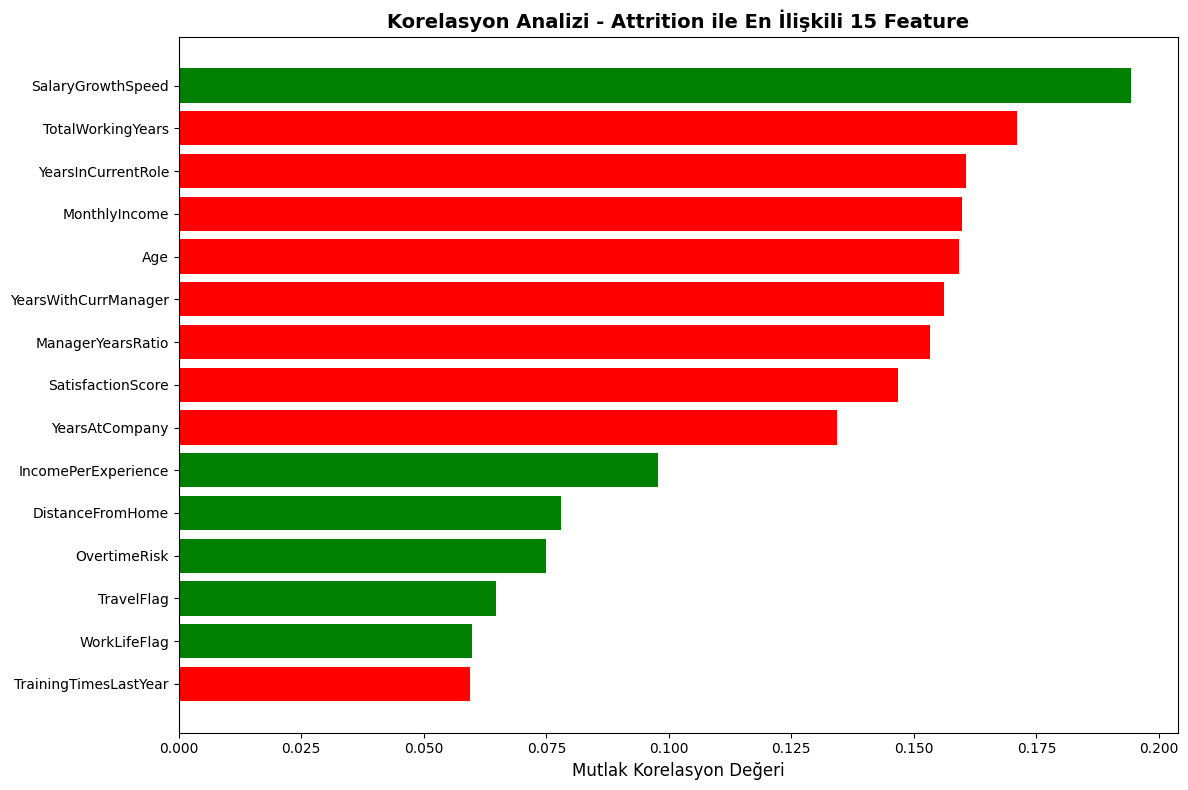

In [93]:
# KORELASYON ANALİZİ

numeric_cols_with_target = numeric_cols + ['Attrition']
correlation_matrix = df[numeric_cols_with_target].corr()

correlation_with_target = correlation_matrix['Attrition'].drop('Attrition')

correlation_with_target_abs = correlation_with_target.abs().sort_values(ascending=False)

correlation_df = pd.DataFrame({
    'Feature': correlation_with_target_abs.index,
    'Correlation': correlation_with_target[correlation_with_target_abs.index].values,
    'Abs_Correlation': correlation_with_target_abs.values
}).sort_values('Abs_Correlation', ascending=False)

print("\n--- EN YÜKSEK KORELASYONLU 15 FEATURE ---")
print(correlation_df.head(15))

# Görselleştirme
plt.figure(figsize=(12, 8))
top_corr = correlation_df.head(15)
colors_corr = ['green' if x > 0 else 'red' for x in top_corr['Correlation']]
plt.barh(range(len(top_corr)), top_corr['Abs_Correlation'], color=colors_corr)
plt.yticks(range(len(top_corr)), top_corr['Feature'])
plt.xlabel('Mutlak Korelasyon Değeri', fontsize=12)
plt.title('Korelasyon Analizi - Attrition ile En İlişkili 15 Feature',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


--- EN YÜKSEK F-SCORE'LU 15 FEATURE ---
                                  Feature    F_Score
20                  nominal__OverTime_Yes  56.559538
59             numeric__SalaryGrowthSpeed  55.707460
26           nominal__TenureCategory_Yeni  55.252988
46             numeric__TotalWorkingYears  42.143368
38                           numeric__Age  41.729236
54             numeric__ManagerYearsRatio  36.194733
19          nominal__MaritalStatus_Single  35.983950
51          numeric__YearsWithCurrManager  34.427882
49            numeric__YearsInCurrentRole  33.692718
30                      ordinal__JobLevel  33.368331
17  nominal__JobRole_Sales Representative  31.126603
42                 numeric__MonthlyIncome  31.017502
48                numeric__YearsAtCompany  28.952703
56             numeric__SatisfactionScore  27.262286
37              ordinal__StockOptionLevel  24.439454


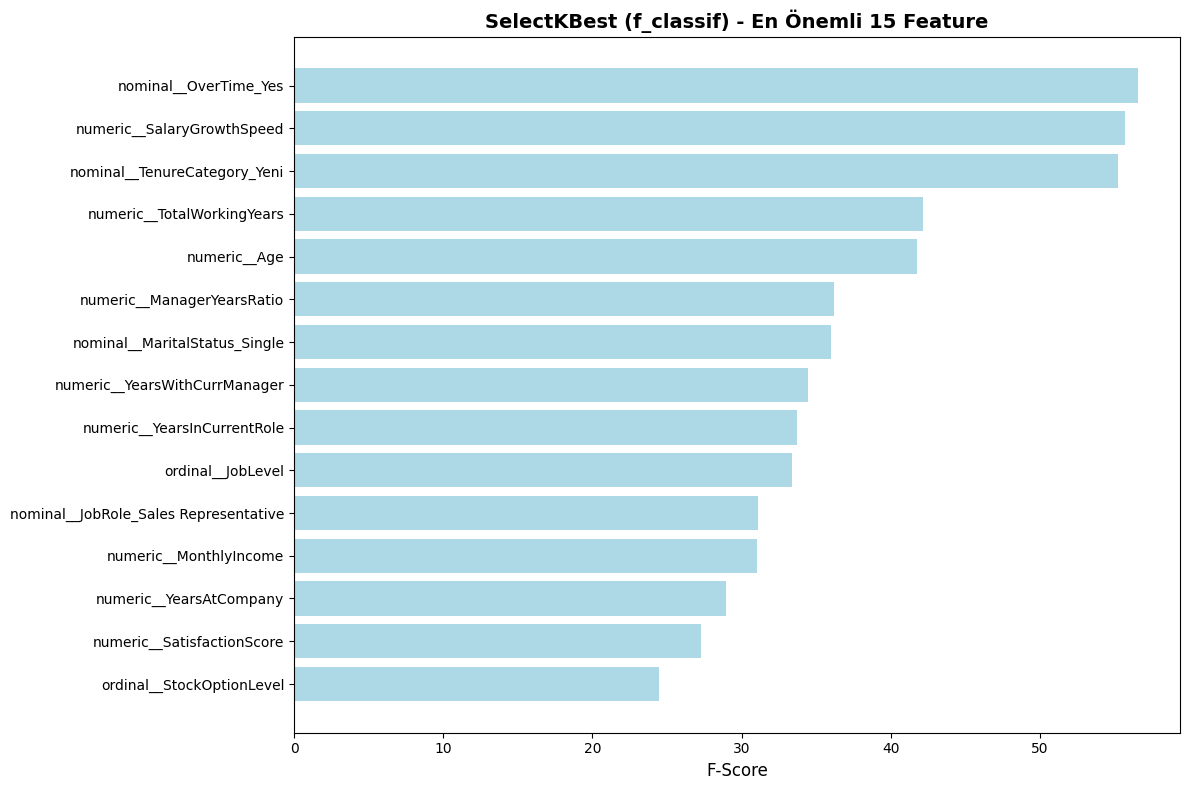

In [94]:
# SELECTKBEST - F_CLASSIF
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_train_processed, y_train)

selectkbest_f_df = pd.DataFrame({
    'Feature': feature_names,
    'F_Score': selector_f.scores_
}).sort_values('F_Score', ascending=False)

print("\n--- EN YÜKSEK F-SCORE'LU 15 FEATURE ---")
print(selectkbest_f_df.head(15))

# Görselleştirme
plt.figure(figsize=(12, 8))
top_f = selectkbest_f_df.head(15)
plt.barh(range(len(top_f)), top_f['F_Score'], color='lightblue')
plt.yticks(range(len(top_f)), top_f['Feature'])
plt.xlabel('F-Score', fontsize=12)
plt.title('SelectKBest (f_classif) - En Önemli 15 Feature', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


--- EN YÜKSEK MUTUAL INFORMATION SKORU 15 FEATURE ---
                                      Feature  MI_Score
55                      numeric__OvertimeRisk  0.048855
20                      nominal__OverTime_Yes  0.036516
42                     numeric__MonthlyIncome  0.036068
17      nominal__JobRole_Sales Representative  0.030468
49                numeric__YearsInCurrentRole  0.030154
44                numeric__NumCompaniesWorked  0.029072
0   nominal__BusinessTravel_Travel_Frequently  0.027833
38                               numeric__Age  0.027697
59                 numeric__SalaryGrowthSpeed  0.027439
48                    numeric__YearsAtCompany  0.025620
54                 numeric__ManagerYearsRatio  0.024894
33                    ordinal__JobInvolvement  0.021176
30                          ordinal__JobLevel  0.018784
41                        numeric__HourlyRate  0.016414
21                  nominal__AgeGroup_Kıdemli  0.015314


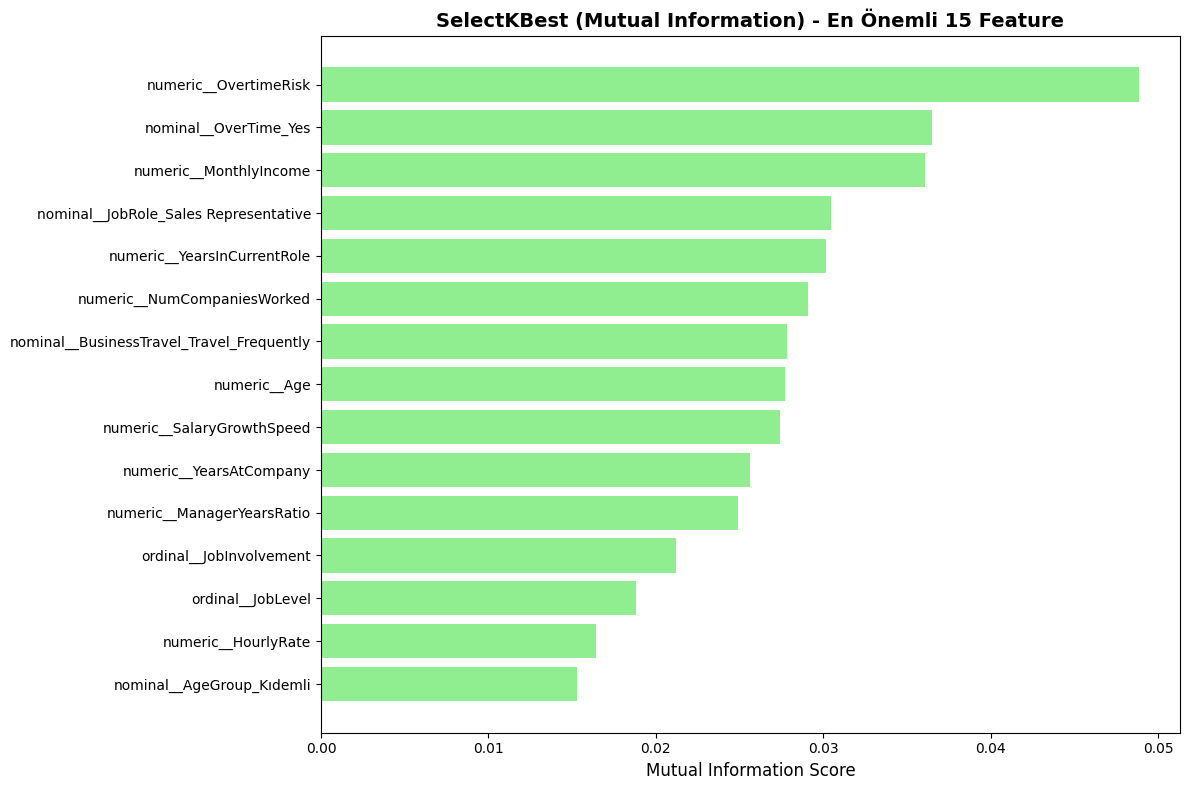

In [95]:
# SELECTKBEST - MUTUAL INFO
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X_train_processed, y_train)

selectkbest_mi_df = pd.DataFrame({
    'Feature': feature_names,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)

print("\n--- EN YÜKSEK MUTUAL INFORMATION SKORU 15 FEATURE ---")
print(selectkbest_mi_df.head(15))

# Görselleştirme
plt.figure(figsize=(12, 8))
top_mi = selectkbest_mi_df.head(15)
plt.barh(range(len(top_mi)), top_mi['MI_Score'], color='lightgreen')
plt.yticks(range(len(top_mi)), top_mi['Feature'])
plt.xlabel('Mutual Information Score', fontsize=12)
plt.title('SelectKBest (Mutual Information) - En Önemli 15 Feature',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [96]:
shap_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP_Importance': [0] * len(feature_names)
})


--- EN ÖNEMLİ 20 FEATURE (Dört Yöntemin Ortalaması) ---
                                           Correlation   F_Score  Mutual_Info  \
Feature                                                                         
nominal__OverTime_Yes                         0.000000  1.000000     0.747439   
numeric__SalaryGrowthSpeed                    0.000000  0.984935     0.561641   
numeric__Age                                  0.000000  0.737793     0.566928   
numeric__MonthlyIncome                        0.000000  0.548404     0.738262   
numeric__YearsInCurrentRole                   0.000000  0.595704     0.617212   
nominal__TenureCategory_Yeni                  0.000000  0.976900     0.200882   
nominal__JobRole_Sales Representative         0.000000  0.550333     0.623635   
numeric__ManagerYearsRatio                    0.000000  0.639940     0.509545   
numeric__OvertimeRisk                         0.000000  0.081068     1.000000   
numeric__TotalWorkingYears                    0.0000

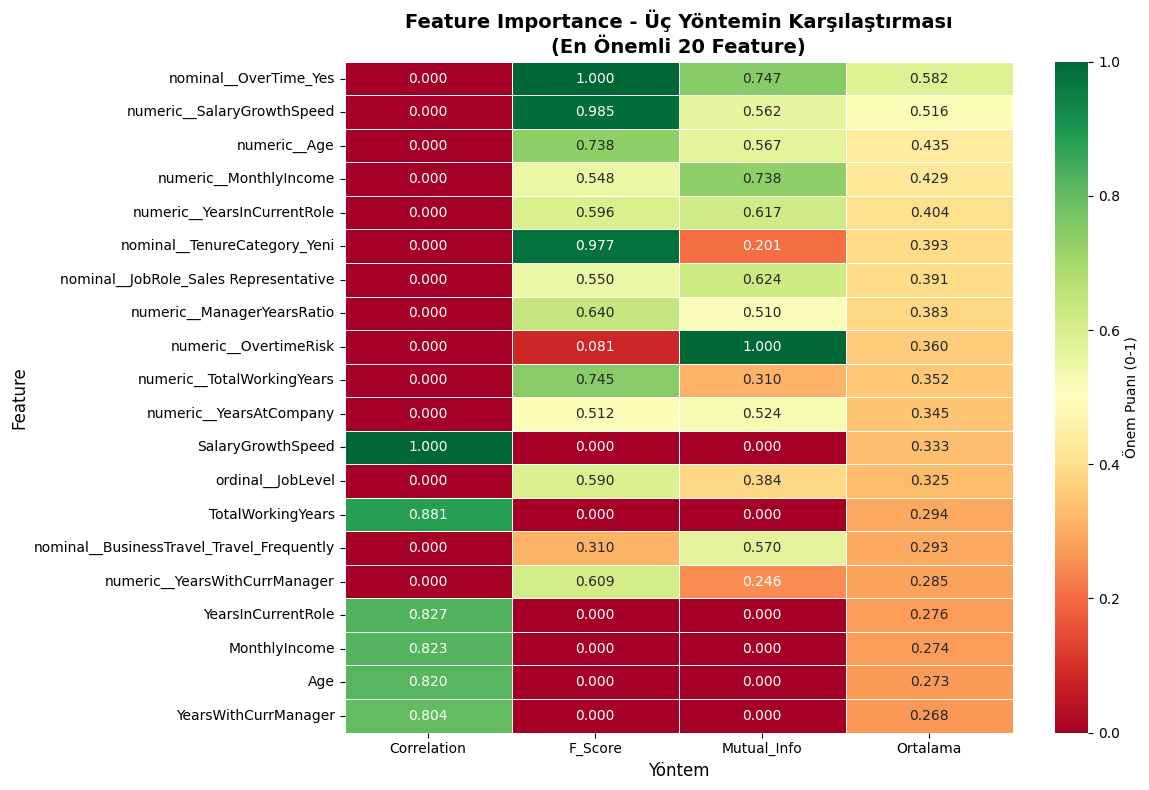

In [97]:
# TÜM YÖNTEMLERİ KARŞILAŞTIRMA

# Feature'lar için index oluştur
correlation_df_indexed = correlation_df.set_index('Feature')['Abs_Correlation']
selectkbest_f_indexed = selectkbest_f_df.set_index('Feature')['F_Score']
selectkbest_mi_indexed = selectkbest_mi_df.set_index('Feature')['MI_Score']

# Hepsini bir DataFrame'de topla
comparison_df = pd.DataFrame({
    'Correlation': correlation_df_indexed,
    'F_Score': selectkbest_f_indexed,
    'Mutual_Info': selectkbest_mi_indexed
})

# Eksik değerleri doldur (bazı features başka tabloda olmayabilir)
comparison_df = comparison_df.fillna(0)

# Her sütunu 0-1 arasında normalize et
comparison_df_normalized = comparison_df.copy()
for col in comparison_df_normalized.columns:
    min_val = comparison_df_normalized[col].min()
    max_val = comparison_df_normalized[col].max()
    comparison_df_normalized[col] = (comparison_df_normalized[col] - min_val) / (max_val - min_val + 1e-10)

# Ortalama önem skoru hesapla
comparison_df_normalized['Ortalama'] = comparison_df_normalized.mean(axis=1)

# Sırala
comparison_df_normalized = comparison_df_normalized.sort_values('Ortalama', ascending=False)

print("\n--- EN ÖNEMLİ 20 FEATURE (Dört Yöntemin Ortalaması) ---")
print(comparison_df_normalized.head(20))

# Heatmap ile görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df_normalized.head(20), annot=True, fmt='.3f',
            cmap='RdYlGn', cbar_kws={'label': 'Önem Puanı (0-1)'}, linewidths=0.5)
plt.title('Feature Importance - Üç Yöntemin Karşılaştırması\n(En Önemli 20 Feature)',
          fontsize=14, fontweight='bold')
plt.xlabel('Yöntem', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


EN ÖNEMLİ 15 FEATURE

 1. nominal__OverTime_Yes                              | Önem Puanı: 0.582
 2. numeric__SalaryGrowthSpeed                         | Önem Puanı: 0.516
 3. numeric__Age                                       | Önem Puanı: 0.435
 4. numeric__MonthlyIncome                             | Önem Puanı: 0.429
 5. numeric__YearsInCurrentRole                        | Önem Puanı: 0.404
 6. nominal__TenureCategory_Yeni                       | Önem Puanı: 0.393
 7. nominal__JobRole_Sales Representative              | Önem Puanı: 0.391
 8. numeric__ManagerYearsRatio                         | Önem Puanı: 0.383
 9. numeric__OvertimeRisk                              | Önem Puanı: 0.360
10. numeric__TotalWorkingYears                         | Önem Puanı: 0.352
11. numeric__YearsAtCompany                            | Önem Puanı: 0.345
12. SalaryGrowthSpeed                                  | Önem Puanı: 0.333
13. ordinal__JobLevel                                  | Önem Puanı: 0.325
14

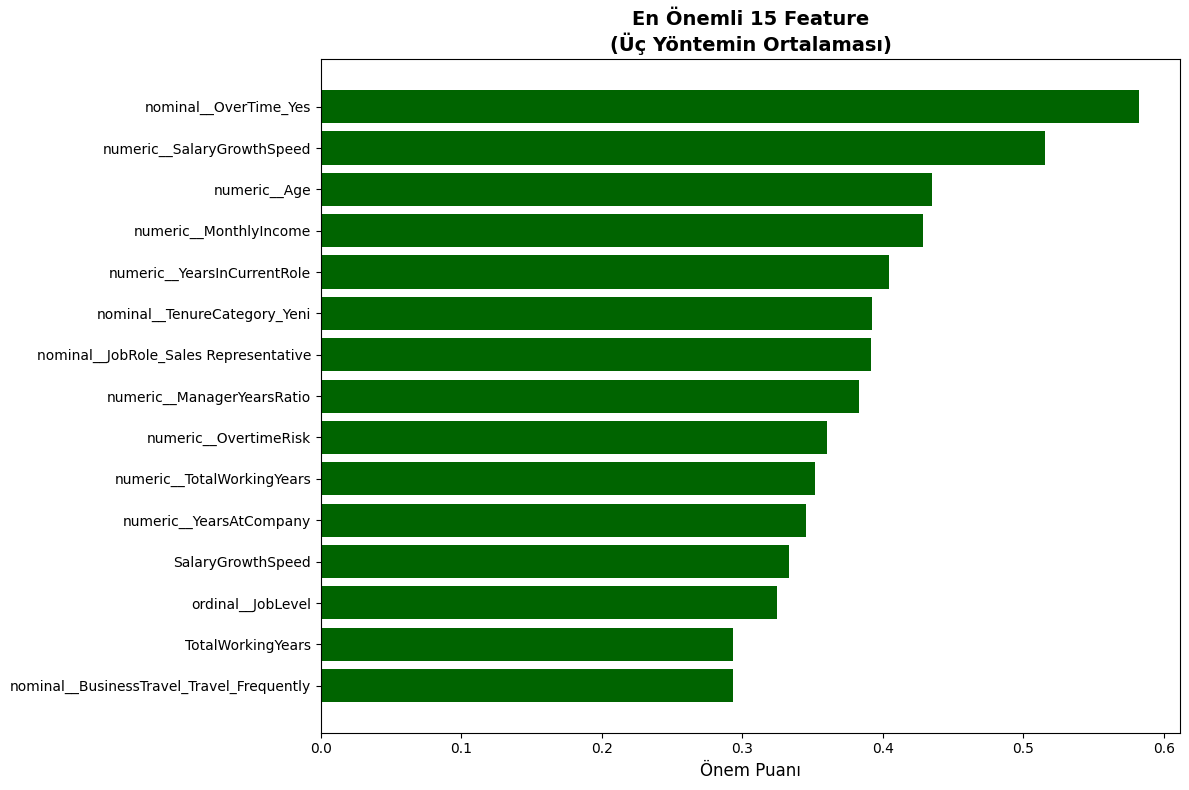

In [98]:
# Top 15 feature'ı seç
top_n = 15
top_features_list = comparison_df_normalized.head(top_n).index.tolist()
top_scores = comparison_df_normalized.head(top_n)['Ortalama'].values

print(f"\n{'='*70}")
print(f"EN ÖNEMLİ {top_n} FEATURE")
print(f"{'='*70}\n")

for i, (feat, score) in enumerate(zip(top_features_list, top_scores), 1):
    print(f"{i:2d}. {feat:<50s} | Önem Puanı: {score:.3f}")

# Görselleştir
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features_list)), top_scores, color='darkgreen')
plt.yticks(range(len(top_features_list)), top_features_list)
plt.xlabel('Önem Puanı', fontsize=12)
plt.title(f'En Önemli {top_n} Feature\n(Üç Yöntemin Ortalaması)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [99]:
# SONUÇ

print(f"Seçilmiş {top_n} Feature:")
for i, feat in enumerate(top_features_list, 1):
    print(f"{i}. {feat}")

# Temiz feature listesi (prefix'siz)
selected_features_clean = []

for feat in top_features_list:
    if '__' in feat:
        clean_feat = feat.split('__')[1]
    else:
        clean_feat = feat
    selected_features_clean.append(clean_feat)

print(f"\n{'='*70}")
print("TEMİZ FEATURE LİSTESİ")
print(f"{'='*70}\n")

print("selected_features = [")
for feat in selected_features_clean:
    print(f"    '{feat}',")
print("]\n")

Seçilmiş 15 Feature:
1. nominal__OverTime_Yes
2. numeric__SalaryGrowthSpeed
3. numeric__Age
4. numeric__MonthlyIncome
5. numeric__YearsInCurrentRole
6. nominal__TenureCategory_Yeni
7. nominal__JobRole_Sales Representative
8. numeric__ManagerYearsRatio
9. numeric__OvertimeRisk
10. numeric__TotalWorkingYears
11. numeric__YearsAtCompany
12. SalaryGrowthSpeed
13. ordinal__JobLevel
14. TotalWorkingYears
15. nominal__BusinessTravel_Travel_Frequently

TEMİZ FEATURE LİSTESİ

selected_features = [
    'OverTime_Yes',
    'SalaryGrowthSpeed',
    'Age',
    'MonthlyIncome',
    'YearsInCurrentRole',
    'TenureCategory_Yeni',
    'JobRole_Sales Representative',
    'ManagerYearsRatio',
    'OvertimeRisk',
    'TotalWorkingYears',
    'YearsAtCompany',
    'SalaryGrowthSpeed',
    'JobLevel',
    'TotalWorkingYears',
    'BusinessTravel_Travel_Frequently',
]



In [100]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

# Mapping (Sayısal Sıralama)
age_map = {'Genç': 0, 'OrtaGenç': 1, 'Orta': 2, 'Kıdemli': 3}
if 'AgeGroup' in df.columns:
    df['AgeGroup'] = df['AgeGroup'].map(age_map).fillna(1).astype(int)

tenure_map = {'Yeni': 0, 'Deneyimli': 1, 'UzunSüreli': 2, 'ÇokUzun': 3}
if 'TenureCategory_Yeni' in df.columns:
    df['TenureCategory_Yeni'] = df['TenureCategory_Yeni'].map(tenure_map).fillna(0).astype(int)

# Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Hedef Değişken
target_col = 'Attrition_Yes' if 'Attrition_Yes' in df_encoded.columns else 'Attrition'
y_final = df_encoded[target_col]

# SEÇİLEN ÖZELLİKLERİ FİLTRELEME
aranan_ozellikler = selected_features_clean

# Sadece df_encoded içinde GERÇEKTEN VAR OLANLARI alıyoruz (Hata vermemesi için)
mevcut_sutunlar = [col for col in aranan_ozellikler if col in df_encoded.columns]
X_final = df_encoded[mevcut_sutunlar]

print(f"Özellikler seçildi. Kullanılan özellik sayısı: {X_final.shape[1]}")
print(f"Kullanılanlar: {mevcut_sutunlar} \n")

# 4. ADIM: TRAIN - TEST AYRIMI
# Bu X_train, Cross Validation döngüsüne girecek olan HAM veridir.
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(f"Veri Ayrıldı (Train: {len(X_train)}, Test: {len(X_test)})")
print(f"SMOTE Öncesi Dağılım: {Counter(y_train)}\n")

# Veri dengesiz olduğu için normal KFold yerine StratifiedKFold kullanıyoruz.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Cross Validation (CV) Nesnesi Oluşturuldu: 5 Katmanlı StratifiedKFold\n")

# 5. ADIM: SMOTE İLE DENGELEME
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Eğitim İçin Hazır Set Oluşturuldu (X_train_smote)")
print(f"SMOTE Sonrası Dağılım: {Counter(y_train_smote)}")

Özellikler seçildi. Kullanılan özellik sayısı: 14
Kullanılanlar: ['OverTime_Yes', 'SalaryGrowthSpeed', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobRole_Sales Representative', 'ManagerYearsRatio', 'OvertimeRisk', 'TotalWorkingYears', 'YearsAtCompany', 'SalaryGrowthSpeed', 'JobLevel', 'TotalWorkingYears', 'BusinessTravel_Travel_Frequently'] 

Veri Ayrıldı (Train: 1176, Test: 294)
SMOTE Öncesi Dağılım: Counter({0: 986, 1: 190})

Cross Validation (CV) Nesnesi Oluşturuldu: 5 Katmanlı StratifiedKFold

Eğitim İçin Hazır Set Oluşturuldu (X_train_smote)
SMOTE Sonrası Dağılım: Counter({0: 986, 1: 986})


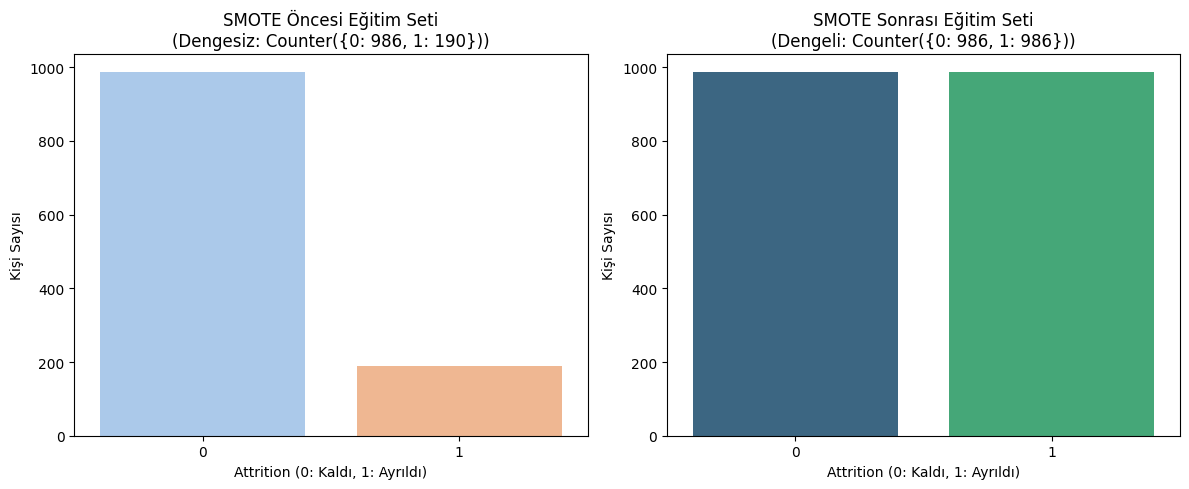

In [101]:
#  SMOTE ÖNCESİ VE SONRASI ---

# (Sol: Dengesiz, Sağ: Dengeli)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. GRAFİK: SMOTE ÖNCESİ (Dengesiz)
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title(f"SMOTE Öncesi Eğitim Seti\n(Dengesiz: {Counter(y_train)})")
axes[0].set_xlabel("Attrition (0: Kaldı, 1: Ayrıldı)")
axes[0].set_ylabel("Kişi Sayısı")

# 2. GRAFİK: SMOTE SONRASI (Dengeli)
sns.countplot(x=y_train_smote, ax=axes[1], palette='viridis')
axes[1].set_title(f"SMOTE Sonrası Eğitim Seti\n(Dengeli: {Counter(y_train_smote)})")
axes[1].set_xlabel("Attrition (0: Kaldı, 1: Ayrıldı)")
axes[1].set_ylabel("Kişi Sayısı")

plt.tight_layout()
plt.show()

In [102]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def model_calistir(model, model_adi, scaler=None):

  print('-'*25 + model_adi + '-'*25)

  steps = [('smote',SMOTE(random_state=42))]

  if scaler is not None:
    steps.append(('scaler', scaler))
    print(f"\n Ölçeklendirme: {scaler.__class__.__name__}")
  else:
    print(f"Ölçeklendirme: Yok (Tree Tabanlı)")

  steps.append(('model', model))

  pipeline = ImbPipeline(steps)

  # Cross Validation
  cv_scores = cross_val_score(pipeline, X_train, y_train, cv = cv_strategy, scoring= 'f1')
  print(f"\n Cross Validation (F1-Score): {cv_scores.mean():.4f} (±{cv_scores.std():.4f}")

  # Eğitme
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  # Sonuç
  accuracy = accuracy_score(y_test, y_pred)
  f1= f1_score(y_test, y_pred)

  print('\n' + '-'*25 + 'TEST SONUÇLARI' + '-'*25)
  print(f' Accuracy: {accuracy:.4f}')
  print(f' F1 Score: {f1:.4f}')
  print("\n Detaylı Rapor:")
  print(classification_report(y_test, y_pred))

  return pipeline

print("model_calistir fonksiyonuna hiperparametre ayarı sonucu gerekli parametreler verilerek model çalıştırılır.")

model_calistir fonksiyonuna hiperparametre ayarı sonucu gerekli parametreler verilerek model çalıştırılır.


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline_for_search = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],       # Komşu sayısı
    'knn__weights': ['uniform', 'distance'],    # Ağırlıklandırma
    'knn__metric': ['euclidean', 'manhattan'],  # Mesafe ölçümü
}

grid_search = GridSearchCV(
    estimator=pipeline_for_search,
    param_grid=param_grid,
    cv=cv_strategy,  # Senin tanımladığın 5 katmanlı StratifiedKFold
    scoring='f1',
)

grid_search.fit(X_train, y_train)

print(f"\nBulunan En İyi Parametreler: {grid_search.best_params_}")

best_params = {k.replace('knn__', ''): v for k, v in grid_search.best_params_.items()}

best_knn_model = KNeighborsClassifier(**best_params)

knn_model = model_calistir(
    model=best_knn_model,
    model_adi="K-Nearest Neighbors",
    scaler=MinMaxScaler()
)




Bulunan En İyi Parametreler: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
-------------------------K-Nearest Neighbors-------------------------

 Ölçeklendirme: MinMaxScaler

 Cross Validation (F1-Score): 0.4069 (±0.0387

-------------------------TEST SONUÇLARI-------------------------
 Accuracy: 0.6905
 F1 Score: 0.3810

 Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       247
           1       0.28      0.60      0.38        47

    accuracy                           0.69       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.80      0.69      0.73       294



In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Pipeline
pipeline_for_search = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# Hiperparametreler
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear'],
    'lr__class_weight': [None, 'balanced']
}

# GridSearch
grid_search = GridSearchCV(
    estimator=pipeline_for_search,
    param_grid=param_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\nBulunan En İyi Parametreler: {grid_search.best_params_}")

# Best params
best_params = {k.replace('lr__',''): v for k,v in grid_search.best_params_.items()}

# Yeni LogisticRegression modeli
best_lr_model = LogisticRegression(max_iter=1000, random_state=42, **best_params)

# model_calistir ile çalıştır
log_model = model_calistir(
    model=best_lr_model,
    model_adi="Logistic Regression",
    scaler=StandardScaler()
)



Bulunan En İyi Parametreler: {'lr__C': 0.1, 'lr__class_weight': None, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
-------------------------Logistic Regression-------------------------

 Ölçeklendirme: StandardScaler

 Cross Validation (F1-Score): 0.4263 (±0.0633

-------------------------TEST SONUÇLARI-------------------------
 Accuracy: 0.7245
 F1 Score: 0.4336

 Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       247
           1       0.32      0.66      0.43        47

    accuracy                           0.72       294
   macro avg       0.62      0.70      0.63       294
weighted avg       0.82      0.72      0.76       294



In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Pipeline oluştur
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# Hiperparametreler
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# GridSearchCV
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)
print(f"\nSVM için En İyi Parametreler: {svm_grid.best_params_}")

# Best params ile model oluştur
best_svm_params = {k.replace('svm__',''): v for k,v in svm_grid.best_params_.items()}
best_svm_model = SVC(probability=True, random_state=42, **best_svm_params)

# model_calistir ile çalıştır
svm_model = model_calistir(
    model=best_svm_model,
    model_adi="Support Vector Machine (SVM)",
    scaler=StandardScaler()
)



SVM için En İyi Parametreler: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
-------------------------Support Vector Machine (SVM)-------------------------

 Ölçeklendirme: StandardScaler

 Cross Validation (F1-Score): 0.4213 (±0.0688

-------------------------TEST SONUÇLARI-------------------------
 Accuracy: 0.7415
 F1 Score: 0.4493

 Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       247
           1       0.34      0.66      0.45        47

    accuracy                           0.74       294
   macro avg       0.63      0.71      0.64       294
weighted avg       0.83      0.74      0.77       294



In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Pipeline (Ağaç tabanlı, scaler gerek yok)
rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Hiperparametre aralıkları
rf_param_dist = {
    'model__n_estimators': [100, 150, 200],       # Daha küçük başlangıç
    'model__max_depth': [10, 15, 20],            # Derinlik seçenekleri
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__class_weight': [None, 'balanced', 'balanced_subsample']
}

# RandomizedSearchCV: sadece 20 rastgele kombinasyonu dene
rf_random = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=20,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

# Fit et
rf_random.fit(X_train, y_train)
print(f"\nRandom Forest için En İyi Parametreler: {rf_random.best_params_}")

# Best params ile model oluştur
best_rf_params = {k.replace('model__',''): v for k,v in rf_random.best_params_.items()}
best_rf_model = RandomForestClassifier(random_state=42, **best_rf_params)

# model_calistir ile çalıştır
rf_model = model_calistir(
    model=best_rf_model,
    model_adi='Random Forest',
    scaler=None
)



Random Forest için En İyi Parametreler: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 15, 'model__class_weight': 'balanced'}
-------------------------Random Forest-------------------------
Ölçeklendirme: Yok (Tree Tabanlı)

 Cross Validation (F1-Score): 0.4255 (±0.0385

-------------------------TEST SONUÇLARI-------------------------
 Accuracy: 0.7721
 F1 Score: 0.3964

 Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       247
           1       0.34      0.47      0.40        47

    accuracy                           0.77       294
   macro avg       0.62      0.65      0.63       294
weighted avg       0.80      0.77      0.79       294



In [107]:
# =============================================================================
#  XGBOOST MODELİ
# =============================================================================

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

print('-' * 50)
print('XGBOOST MODELİ (Hiperparametre Optimizasyonu ile)')
print('-' * 50)

#  KRİTİK DÜZELTME: Hem Train hem Test setindeki ikiz sütunları siliyoruz
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

print(f" Veri setleri temizlendi.")
print(f"   Train Sütun Sayısı: {X_train.shape[1]}")
print(f"   Test Sütun Sayısı:  {X_test.shape[1]}")

# 1. Pipeline Kurulumu
xgb_pipeline_search = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# 2. Hiperparametre Havuzu
xgb_params = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__scale_pos_weight': [1, 5]
}

# 3. RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb_pipeline_search,
    param_distributions=xgb_params,
    n_iter=10,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

# Temiz X_train ile eğitim
xgb_random.fit(X_train, y_train)
print(f"XGBoost En İyi Parametreler: {xgb_random.best_params_}")

# 4. En İyi Modeli Çalıştır (Temiz X_test ile test edecek)
best_xgb = xgb_random.best_estimator_['model']

xgb_model = model_calistir(
    model=best_xgb,
    model_adi='XGBoost Classifier',
    scaler=None
)

# 5. Listeye Ekle
if 'models' in locals():
    models['XGBoost'] = xgb_model
    print(" XGBoost karşılaştırma tablosuna eklendi.")

--------------------------------------------------
XGBOOST MODELİ (Hiperparametre Optimizasyonu ile)
--------------------------------------------------
 Veri setleri temizlendi.
   Train Sütun Sayısı: 12
   Test Sütun Sayısı:  12
XGBoost En İyi Parametreler: {'model__subsample': 0.8, 'model__scale_pos_weight': 1, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.01}
-------------------------XGBoost Classifier-------------------------
Ölçeklendirme: Yok (Tree Tabanlı)

 Cross Validation (F1-Score): 0.3941 (±0.0702

-------------------------TEST SONUÇLARI-------------------------
 Accuracy: 0.7415
 F1 Score: 0.4328

 Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       247
           1       0.33      0.62      0.43        47

    accuracy                           0.74       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.82      0.74      0.77       294

 XGBoost

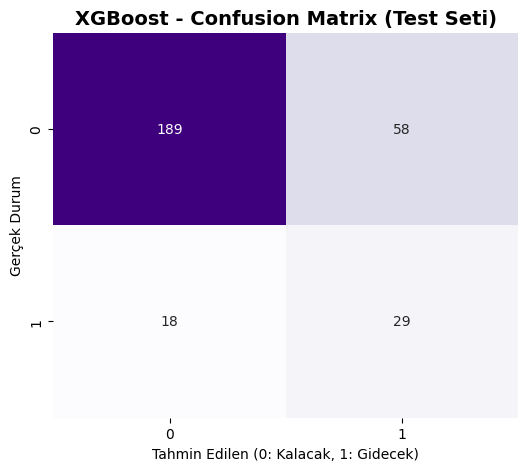

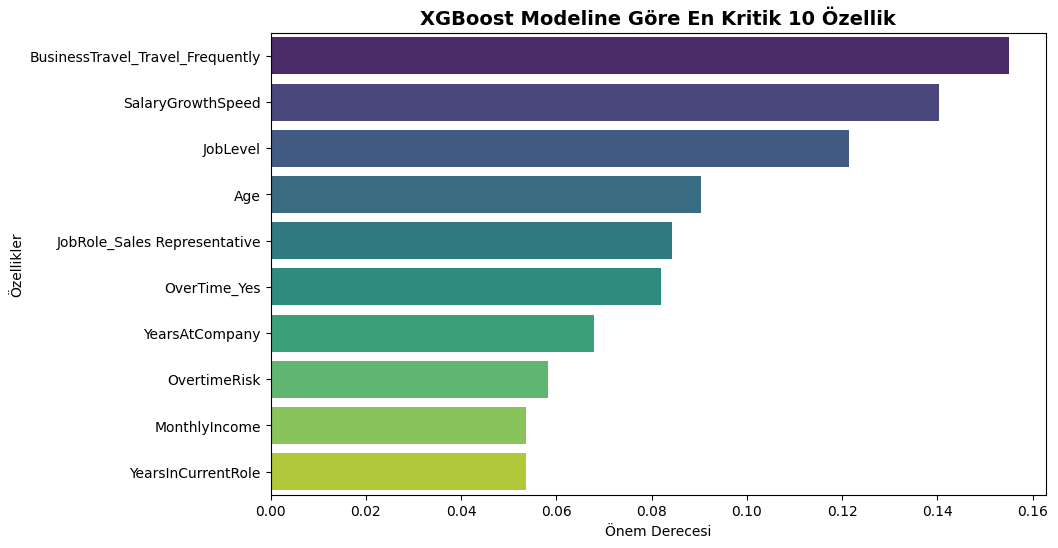

In [110]:
# =============================================================================
# XGBOOST MODEL GÖRSELLEŞTİRME (Confusion Matrix & Feature Importance)
# =============================================================================
# 1. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 5))
y_pred_xgb = xgb_model.predict(X_test) # Tahminleri al
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('XGBoost - Confusion Matrix (Test Seti)', fontsize=14, fontweight='bold')
plt.xlabel('Tahmin Edilen (0: Kalacak, 1: Gidecek)')
plt.ylabel('Gerçek Durum')
plt.show()

# 2. ÖZNİTELİK ÖNEM DÜZEYLERİ (FEATURE IMPORTANCE)
# Pipeline içindeki eğitilmiş XGBoost modelini çekiyoruz
if hasattr(xgb_model, 'named_steps'):
    asil_model = xgb_model.named_steps['model']
else:
    asil_model = best_xgb # Eğer pipeline değil direkt modelse

# Özellik isimlerini alıyoruz
feature_names = X_train.columns
importances = asil_model.feature_importances_

# Önem derecelerini bir tablo yapıp sıralayalım
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10) # En önemli 10 tanesi

# Grafiği çiziyoruz
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('XGBoost Modeline Göre En Kritik 10 Özellik', fontsize=14, fontweight='bold')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print(" Veriler ve Modeller Yenileniyor...")

# 1. VERİYİ GARANTİ TEMİZLEME
# Tekrar eden sütunlar varsa silinir, yoksa aynen kalır.
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

print(f" Veri Seti Durumu: Train {X_train.shape}, Test {X_test.shape}")

# 2. MODEL ÇALIŞTIRMA FONKSİYONU (Tekrar tanımlıyoruz, garanti olsun)
def model_kur(model, scaler=None):
    steps = [('smote', SMOTE(random_state=42))]
    if scaler:
        steps.append(('scaler', scaler))
    steps.append(('model', model))

    pipeline = ImbPipeline(steps)
    pipeline.fit(X_train, y_train) # Temiz veriyle eğitiliyor
    return pipeline

# 3. TÜM MODELLERİ SIFIRDAN KURUYORUZ (Temiz veriyle)
models = {}

print("1. Logistic Regression eğitiliyor...")
models['Logistic Regression'] = model_kur(
    LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    scaler=StandardScaler()
)

print("2. KNN eğitiliyor...")
models['K-Nearest Neighbors'] = model_kur(
    KNeighborsClassifier(n_neighbors=5),
    scaler=MinMaxScaler()
)

print("3. SVM eğitiliyor...")
models['Support Vector Machine'] = model_kur(
    SVC(probability=True, random_state=42),
    scaler=StandardScaler()
)

print("4. Random Forest eğitiliyor...")
models['Random Forest'] = model_kur(
    RandomForestClassifier(n_estimators=100, random_state=42),
    scaler=None
)

print("5. XGBoost eğitiliyor...")
models['XGBoost'] = model_kur(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    scaler=None
)

print("\nTÜM MODELLER HAZIR! Karşılaştırma Başlıyor...\n")

# =============================================================================
# KARŞILAŞTIRMA VE GÖRSELLEŞTİRME KISMI
# =============================================================================

results = []
plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Tahmin
        y_pred = model.predict(X_test)

        # Olasılık (ROC için)
        y_proba = None
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'named_steps'): # Pipeline içindeyse
            y_proba = model.named_steps['model'].predict_proba(X_test)[:, 1] # Hata olursa burayı atlarız

        # ROC Eğrisi Çizimi
        roc_val = 0
        if y_proba is not None:
            roc_val = roc_auc_score(y_test, y_proba)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_val:.3f})')

        # Skorlar
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'F1 Score': f1,
            'ROC AUC': roc_val
        })

    except Exception as e:
        print(f" {name} hesaplanırken hata: {e}")

# ROC Grafiği Ayarları
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri Karşılaştırması')
plt.legend()
plt.show()

# Tabloyu Göster
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print('\n FİNAL MODEL PERFORMANS TABLOSU:')
display(results_df)

# Bar Grafiği
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Accuracy'], width, label='Accuracy', color='#3498db')
plt.bar(x + width/2, results_df['F1 Score'], width, label='F1 Score', color='#2ecc71')

plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.title('Model Performans Karşılaştırması')
plt.xticks(x, results_df['Model'], rotation=15)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# ---  SHAP ANALİZİ  ---
import shap
import matplotlib.pyplot as plt
import pandas as pd

print('-' * 50)
print('SHAP ANALİZİ - GÜNCEL RANDOM FOREST')
print('-' * 50)

# En son eğittiğimiz modeller sözlüğünden Random Forest'ı alıyoruz
if 'models' in locals() and 'Random Forest' in models:
    # Pipeline içinden asıl modeli çekiyoruz
    current_rf_pipeline = models['Random Forest']
    rf_estimator = current_rf_pipeline.named_steps['model']

    explainer = shap.TreeExplainer(rf_estimator)

    # Test verisi zaten temizlendi (X_test)
    # Sütun isimlerini koruyarak DataFrame yapalım
    if hasattr(X_test, 'columns'):
        X_test_shap = X_test
    else:
        # Eğer numpy array ise (ColumnTransformer bazen array yapar)
        X_test_shap = pd.DataFrame(X_test, columns=X_train.columns)

    print("SHAP değerleri hesaplanıyor (Bu işlem biraz sürebilir)...")

    # check_additivity=False ile hatayı engelliyoruz
    shap_values = explainer.shap_values(X_test_shap, check_additivity=False)

    # Binary classification kontrolü
    if isinstance(shap_values, list):
        shap_values_target = shap_values[1]
    elif len(shap_values.shape) == 3:
        shap_values_target = shap_values[:, :, 1]
    else:
        shap_values_target = shap_values

    print('SHAP Hesaplandı. Grafikler çiziliyor...')

    # 1. Summary Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values_target, X_test_shap, plot_type='bar', show=False)
    plt.title('SHAP Feature Importance (Random Forest )', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 2. Beeswarm Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values_target, X_test_shap, show=False)
    plt.title('SHAP Summary Plot (Beeswarm )', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(" HATA: 'models' sözlüğü veya içinde 'Random Forest' bulunamadı.")